In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight



In [28]:
RANDOM_STATE_SEED = np.random.randint(123)
print(RANDOM_STATE_SEED)

113


In [29]:
df_dataset = pd.read_csv("/home/mintssj/Downloads/datasets/filtered/df_equal_Infilteration.csv")


In [30]:
df_dataset = df_dataset.dropna(axis=1)

In [40]:
display(df_dataset.isna().sum())

Dst Port             0
Protocol             0
Timestamp            0
Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Min          0
Fwd PSH Flags        0
Bwd PSH Flags        0
Fwd URG Flags        0
Bwd URG Flags        0
Fwd Header Len       0
FIN Flag Cnt         0
RST Flag Cnt         0
PSH Flag Cnt         0
ACK Flag Cnt         0
URG Flag Cnt         0
CWE Flag Count       0
Down/Up Ratio        0
Fwd Byts/b Avg       0
Fwd Pkts/b Avg       0
Fwd Blk Rate Avg     0
Bwd Byts/b Avg       0
Bwd Pkts/b Avg       0
Bwd Blk Rate Avg     0
Init Fwd Win Byts    0
Init Bwd Win Byts    0
Fwd Act Data Pkts    0
Fwd Seg Siz

In [32]:
train, test = train_test_split(df_dataset, test_size=0.3, random_state=RANDOM_STATE_SEED)

In [33]:
df_dataset["Label"].value_counts()

Label
Benign           146327
Infilteration    146327
Name: count, dtype: int64

In [34]:
y_train = np.array(train.pop("Label"))# pop removes "Label" from the dataframe
#y_train = np.array(train.pop("Timestamp"))
X_train = train.values

print(type(X_train))
print(type(y_train))
print(X_train.shape)
print(y_train.shape)


y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
#y_test = np.array(test.pop("Timestamp"))
X_test = test.values

print(type(X_test))
print(type(y_test))
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(204857, 48)
(204857,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(87797, 48)
(87797,)


In [35]:
model = tree.DecisionTreeClassifier()

hyperparameters = {
    'criterion': ['gini','entropy','log_loss']
}

clf = GridSearchCV(
    estimator=model,
    param_grid=hyperparameters,
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

In [36]:
%%time
clf.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/home/mintssj/Downloads/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mintssj/Downloads/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mintssj/Downloads/.venv/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/home/mintssj/Downloads/.venv/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criteri

CPU times: user 4.83 s, sys: 683 ms, total: 5.51 s
Wall time: 10.3 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss']},
             verbose=1)

In [37]:
print("Accuracy score on Validation set: \n")
print(clf.best_score_ )
print("---------------")
print("Best performing hyperparameters on Validation set: ")
print(clf.best_params_)
print("---------------")
print(clf.best_estimator_)

Accuracy score on Validation set: 

0.8646909698199892
---------------
Best performing hyperparameters on Validation set: 
{'criterion': 'gini'}
---------------
DecisionTreeClassifier()


In [38]:
model = clf.best_estimator_
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8603255236511498


<Axes: >

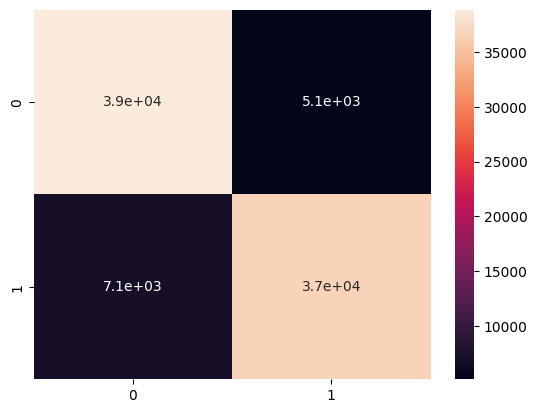

In [39]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)